In [2]:
import ROOT
import uproot

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/00


In [3]:
#fileName = "/data/alice/wesselr/07-09-2021_Pt120_tune14_58MB/JetToyHIResultSoftDrop.root"
fileName = "~/Library/JetToyHI/JetToyHIResultSoftDrop.root"

In [4]:
# different file locations for different systems
inFile = ROOT.TFile(fileName, "READ")
inFile.ls()

TFile**		/home/wessel/Library/JetToyHI/JetToyHIResultSoftDrop.root	
 TFile*		/home/wessel/Library/JetToyHI/JetToyHIResultSoftDrop.root	
  KEY: TTree	jetTreeSig;1	JetToyHI tree


In [5]:
tree = inFile.Get("jetTreeSig")
tree.Print()

******************************************************************************
*Tree    :jetTreeSig: JetToyHI tree                                          *
*Entries :    10000 : Total =        50553578 bytes  File  Size =   41735274 *
*        :          : Tree compression factor =   1.21                       *
******************************************************************************
*Br    0 :eventWeight : vector<double>                                       *
*Entries :    10000 : Total  Size=     301565 bytes  File Size  =      28568 *
*Baskets :       11 : Basket Size=      32000 bytes  Compression=  10.54     *
*............................................................................*
*Br    1 :sigJetPt  : vector<double>                                         *
*Entries :    10000 : Total  Size=     480174 bytes  File Size  =     377353 *
*Baskets :       17 : Basket Size=      32000 bytes  Compression=   1.27     *
*...................................................

In [6]:
pt = tree.GetBranch("sigJetPt")
eta = tree.GetBranch("sigJetEta")
m = tree.GetBranch("sigJetM")

#pt_hist = ROOT.TH1D("data","m_{ll}, data" ,150,50.e3 ,200.e3)
#pt_hist.Sumw2()

In [7]:
type(pt)

<class cppyy.gbl.TBranchElement at 0x556af305f400>

In [8]:
data, columns = tree.AsMatrix(columns=["sigJetRecur_nSD"], dtype="vector<double>")

/home/wessel/Library/root/lib/ROOT/pythonization/_ttree.py:191: FutureWarning: TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.
  warnings.warn("TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.", FutureWarning)


Exception: Reading of branch ['sigJetRecur_nSD'] is not supported (branch has unsupported data-type ['vector<double>']).

In [10]:
for entry in range(0, tree.GetEntries()):
    print(entry)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775


5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470


7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315


8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076


In [11]:
help(ROOT.TTree)

Help on class TTree in module :

class TTree(TNamed, TAttLine, TAttFill, TAttMarker)
 |  cppyy object proxy (internal)
 |  
 |  Method resolution order:
 |      TTree
 |      TNamed
 |      TObject
 |      TAttLine
 |      TAttFill
 |      TAttMarker
 |      CPPInstance
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AddAllocationCount(...)
 |      void TTree::AddAllocationCount(unsigned int count)
 |  
 |  AddBranchToCache(...)
 |      int TTree::AddBranchToCache(const char* bname, bool subbranches = kFALSE)
 |      int TTree::AddBranchToCache(TBranch* branch, bool subbranches = kFALSE)
 |  
 |  AddClone(...)
 |      void TTree::AddClone(TTree*)
 |  
 |  AddFriend(...)
 |      TFriendElement* TTree::AddFriend(const char* treename, const char* filename = "")
 |      TFriendElement* TTree::AddFriend(const char* treename, TFile* file)
 |      TFriendElement* TTree::AddFriend(TTree* tree, const char* alias = "", bool warn = kFALSE)
 |  
 |  AddTotBytes(...)
 |      void TT

# Use uproot to access the data from the .root file

In [12]:
file = uproot.open(fileName)
tree = file['jetTreeSig']

print(type(tree),
     file.keys(),
     tree.keys(),
     tree.arrays(), sep="\n")

<class 'uproot.models.TTree.Model_TTree_v20'>
['jetTreeSig;1']
['eventWeight', 'sigJetPt', 'sigJetEta', 'sigJetPhi', 'sigJetM', 'sigJetArea', 'sigJetRecurKT_nSD', 'sigJetRecurKT_zSD', 'sigJetRecur_nSD', 'sigJetRecur_zSD', 'sigJetRecurKT_dr12', 'sigJetRecurKT_erad', 'sigJetRecurKT_jetpt', 'sigJetRecurKT_logdr12', 'sigJetRecurKT_logztheta', 'sigJetRecurKT_tf', 'sigJetRecurKT_z', 'sigJetRecur_dr12', 'sigJetRecur_erad', 'sigJetRecur_jetpt', 'sigJetRecur_logdr12', 'sigJetRecur_logztheta', 'sigJetRecur_tf', 'sigJetRecur_z', 'sigJetSDZ01B00Pt', 'sigJetSDZ01B00Eta', 'sigJetSDZ01B00Phi', 'sigJetSDZ01B00M', 'sigJetSDZ01B00Area', 'sigJetSDZ01B00dr12', 'sigJetSDZ01B00leadingtrack_pt', 'sigJetSDZ01B00logdr12', 'sigJetSDZ01B00logztheta', 'sigJetSDZ01B00mass', 'sigJetSDZ01B00zg', 'sigJetSDZ01B00ndrop', 'sigJetSDZ01B00KTPt', 'sigJetSDZ01B00KTEta', 'sigJetSDZ01B00KTPhi', 'sigJetSDZ01B00KTM', 'sigJetSDZ01B00KTArea', 'sigJetSDZ01B00KTdr12', 'sigJetSDZ01B00KTleadingtrack_pt', 'sigJetSDZ01B00KTlogdr12', 's

## First experiment with numpy

In [13]:
# did not work on the NIKHEF PCs!!!
# two issues on Nikhef PC: 1. I could not access tree.arrays() 2. I could not set library="np"
data = tree.arrays(library="np")
print(type(tree), type(data), type(data['sigJetPt']), type(tree['sigJetPt']), sep="\n")

<class 'uproot.models.TTree.Model_TTree_v20'>
<class 'dict'>
<class 'numpy.ndarray'>
<class 'uproot.models.TBranch.Model_TBranchElement_v10'>


### Test to print out all the Pts of first particle of a jet
First using sigJetPt, then with sigJetRecurKT_pt

In [14]:
data['sigJetPt'][:30] # 30 events
pts = data['sigJetPt'][:30]
print([data['sigJetPt'][:30][i][0] for i in range(30)])
print(pts)

[127.65385373628487, 125.06488729827635, 135.1513415247233, 114.88820703294685, 150.37956096580157, 123.7939679688146, 117.29340599165937, 171.50746597336504, 115.74803680983018, 155.10850919274972, 218.59051891987016, 136.24629162527498, 163.69697554606796, 116.76617232294795, 130.62338197538324, 127.49099933011661, 134.6356680954921, 215.80987593780077, 156.1528364328737, 116.12093441509772, 112.38666580600616, 163.5213007823744, 145.06673132502445, 124.96753304632769, 126.946682644998, 119.18189567379392, 130.81433681246335, 117.45885392823894, 153.20824113984528, 134.13638558423372]
[array([127.65385374,  62.06315332,  44.98351195,  15.75174406])
 array([125.0648873 , 125.05655444])
 array([135.15134152, 101.60587589,  98.44981064,  41.33964837,
         14.78993319,  14.38323337])
 array([114.88820703,  57.44248691,  28.99706184,  23.89120846,
         17.45000284,  16.36377076,  10.64690952])
 array([150.37956097,  95.33637218,  31.22942992,  20.25300356,
         19.03354342,  1

In [15]:
pts_recur = [data['sigJetRecur_jetpt'][:30][i][0][0] for i in range(30)]
print(pts_recur)

[127.65385373628489, 125.06488729827635, 135.15134152472328, 114.88820703294684, 150.37956096580157, 123.79396796881461, 117.29340599165937, 171.5074659733651, 115.7480368098302, 155.10850919274972, 218.59051891987016, 136.246291625275, 163.69697554606793, 116.76617232294795, 130.62338197538324, 127.49099933011664, 134.6356680954921, 215.80987593780083, 156.15283643287376, 116.12093441509772, 112.38666580600616, 163.52130078237434, 145.06673132502442, 124.96753304632767, 126.94668264499803, 119.18189567379389, 130.81433681246338, 117.45885392823894, 153.2082411398453, 134.13638558423372]


In [16]:
# Todo: flatten this?
pt = data["sigJetPt"]
m = data["sigJetM"]
eta = data["sigJetEta"]

print(pt, pt.shape, type(pt), sep="\n")

[array([127.65385374,  62.06315332,  44.98351195,  15.75174406])
 array([125.0648873 , 125.05655444])
 array([135.15134152, 101.60587589,  98.44981064,  41.33964837,
         14.78993319,  14.38323337])                            ...
 array([111.76494105,  89.09993773,  30.94540444,  21.10125648,
         16.55965967])
 array([158.95519838, 142.64143141])
 array([116.99149257,  74.19686412,  50.82247085,  36.29841975,
         30.92836629,  14.71563875,  10.74569065])             ]
(10000,)
<class 'numpy.ndarray'>


In [29]:
pt_recur = data["sigJetRecurKT_dr12"]
dr12_recur = data["sigJetRecurKT_jetpt"]
z_recur = data["sigJetRecurKT_z"]

print(pt_recur,
      pt_recur.shape, 
      type(pt_recur),
      pt_recur[0],
      #pt_recur[0].shape,
      type(pt_recur[0]), #TODO: waarom is dit een STLVector? Ik gebruik library="np", ik wil alles in np.ndarrays...
      sep="\n")

[<STLVector [[0.05400801684056807, 0.06675364384739498, ..., 0.010123162653256289], ...] at 0x7fbada469430>
 <STLVector [[0.2525232967970026, 0.09809020690770014, ..., 0.021106014270743077], ...] at 0x7fbada4692e0>
 <STLVector [[0.0773526576420049, 0.2839476485663948, ..., 0.008447872491522762], ...] at 0x7fbadd0c4b50>
 ...
 <STLVector [[0.3396918456248599, 0.14207863039627397, ..., 0.010283247704913293], ...] at 0x7fbad754abb0>
 <STLVector [[0.08464051750423393, 0.04152132375776153, ..., 0.007887432201230627], ...] at 0x7fbad754ad30>
 <STLVector [[0.04029389238964564, 0.08588006702999695, 0.03791699556060816, 0.007844721400005243], ...] at 0x7fbad754af10>]
(10000,)
<class 'numpy.ndarray'>
[[0.05400801684056807, 0.06675364384739498, ..., 0.010123162653256289], ...]
<class 'uproot.containers.STLVector'>


## Now try with pandas, is it better?

In [17]:
df, columns = tree.arrays(library="pd")

In [18]:
print(df.keys(), columns.keys(), df.shape, columns.shape, sep="\n")
print([x for x in columns.keys() if x not in df.keys()])

Index(['eventWeight', 'sigJetRecurKT_dr12', 'sigJetRecurKT_erad',
       'sigJetRecurKT_jetpt', 'sigJetRecurKT_logdr12',
       'sigJetRecurKT_logztheta', 'sigJetRecurKT_tf', 'sigJetRecurKT_z',
       'sigJetRecur_dr12', 'sigJetRecur_erad', 'sigJetRecur_jetpt',
       'sigJetRecur_logdr12', 'sigJetRecur_logztheta', 'sigJetRecur_tf',
       'sigJetRecur_z'],
      dtype='object')
Index(['sigJetPt', 'sigJetEta', 'sigJetPhi', 'sigJetM', 'sigJetArea',
       'sigJetRecurKT_nSD', 'sigJetRecurKT_zSD', 'sigJetRecur_nSD',
       'sigJetRecur_zSD', 'sigJetRecurKT_dr12', 'sigJetRecurKT_erad',
       'sigJetRecurKT_jetpt', 'sigJetRecurKT_logdr12',
       'sigJetRecurKT_logztheta', 'sigJetRecurKT_tf', 'sigJetRecurKT_z',
       'sigJetRecur_dr12', 'sigJetRecur_erad', 'sigJetRecur_jetpt',
       'sigJetRecur_logdr12', 'sigJetRecur_logztheta', 'sigJetRecur_tf',
       'sigJetRecur_z', 'sigJetSDZ01B00Pt', 'sigJetSDZ01B00Eta',
       'sigJetSDZ01B00Phi', 'sigJetSDZ01B00M', 'sigJetSDZ01B00Area',
       

In [19]:
print(columns.head())

                  sigJetPt  sigJetEta  sigJetPhi    sigJetM  sigJetArea  \
entry subentry                                                            
0     0         127.653854  -0.263258   1.485177  11.988297    0.498336   
      1          62.063153  -0.964957   4.483998   9.070193    0.508303   
      2          44.983512  -1.683216   4.483094   7.734943    0.473419   
      3          15.751744  -0.482852   4.644334   4.034264    0.373752   
1     0         125.064887   1.263472   0.146300  17.930640    0.518269   

                sigJetRecurKT_nSD  sigJetRecurKT_zSD  sigJetRecur_nSD  \
entry subentry                                                          
0     0                       5.0           1.381316             12.0   
      1                       7.0           2.463303              7.0   
      2                       5.0           1.849848              8.0   
      3                       3.0           0.536790              3.0   
1     0                       9.0   

In [20]:
print(type(tree), type(df), len(df), sep="\n")#, type(data['sigJetPt']), type(tree['sigJetPt']), sep="\n")
print(type(df), type(columns))

<class 'uproot.models.TTree.Model_TTree_v20'>
<class 'pandas.core.frame.DataFrame'>
20000
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [21]:
pt = columns["sigJetPt"]
print(pt, pt.shape, type(pt), sep="\n")

entry  subentry
0      0           127.653854
       1            62.063153
       2            44.983512
       3            15.751744
1      0           125.064887
                      ...    
9999   2            50.822471
       3            36.298420
       4            30.928366
       5            14.715639
       6            10.745691
Name: sigJetPt, Length: 42250, dtype: float64
(42250,)
<class 'pandas.core.series.Series'>


array([[<AxesSubplot:xlabel='sigJetPt', ylabel='sigJetPt'>,
        <AxesSubplot:xlabel='sigJetEta', ylabel='sigJetPt'>,
        <AxesSubplot:xlabel='sigJetM', ylabel='sigJetPt'>],
       [<AxesSubplot:xlabel='sigJetPt', ylabel='sigJetEta'>,
        <AxesSubplot:xlabel='sigJetEta', ylabel='sigJetEta'>,
        <AxesSubplot:xlabel='sigJetM', ylabel='sigJetEta'>],
       [<AxesSubplot:xlabel='sigJetPt', ylabel='sigJetM'>,
        <AxesSubplot:xlabel='sigJetEta', ylabel='sigJetM'>,
        <AxesSubplot:xlabel='sigJetM', ylabel='sigJetM'>]], dtype=object)

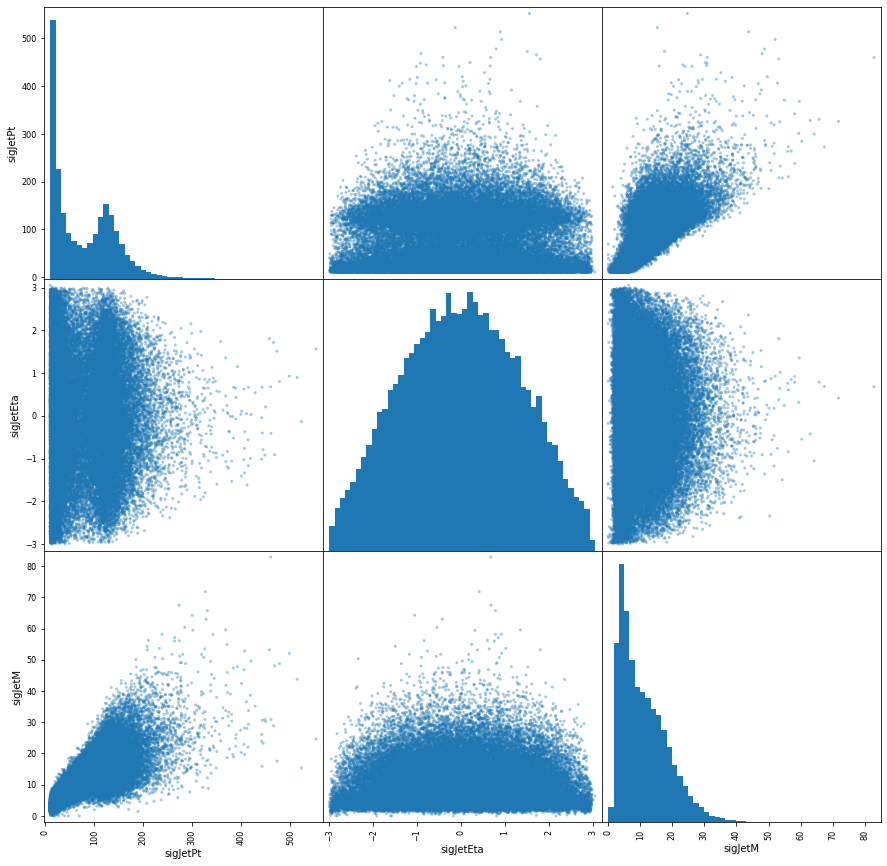

In [24]:
df1 = columns[["sigJetPt", "sigJetEta", "sigJetM"]]
pd.plotting.scatter_matrix(df1, alpha=0.4, hist_kwds={'bins':50}, figsize=(15,15))

In [30]:
df2 = columns[["sigJetRecurKT_dr12", "sigJetRecurKT_jetpt", "sigJetRecurKT_z"]]
df2.head()

sigJetRecurKT_dr12  \
entry subentry                                                      
0     0         ((0.05400801684056807, 0.06675364384739498, 0....   
      1         ((0.05400801684056807, 0.06675364384739498, 0....   
      2         ((0.05400801684056807, 0.06675364384739498, 0....   
      3         ((0.05400801684056807, 0.06675364384739498, 0....   
1     0         ((0.2525232967970026, 0.09809020690770014, 0.0...   

                                              sigJetRecurKT_jetpt  \
entry subentry                                                      
0     0         ((127.65385373628489, 72.25918316975185, 58.09...   
      1         ((127.65385373628489, 72.25918316975185, 58.09...   
      2         ((127.65385373628489, 72.25918316975185, 58.09...   
      3         ((127.65385373628489, 72.25918316975185, 58.09...   
1     0         ((125.06488729827636, 113.47661474488189, 87.1...   

                                                  sigJetRecurKT_z  
entry subentry                                                     
0     0         ((0.4341248772035551, 0.1959765782242026, 0.13...  
      1         ((0.4341248772035551, 0.1959765782242026, 0.13...  
      2         ((0.4341248772035551, 0.1959765782242026, 0.13...  
      3         ((0.4341248772035551, 0.1959765782242026, 0.13...  
1     0         ((0.09268204784719365, 0.23257134905955396, 0....

In [25]:
pd.plotting.scatter_matrix(df2, alpha=0.4, hist_kwds={'bins':50}, figsize=(15,15))

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1080x1080 with 0 Axes>